In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('it_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100750 entries, 0 to 100749
Data columns (total 10 columns):
CUSTOMER_ID         100750 non-null int64
ORDERS              100750 non-null int64
FIRST_ORDER_DATE    100750 non-null object
LAST_ORDER_DATE     100750 non-null object
TOTAL_CM2           100750 non-null object
NET_SALES           100750 non-null object
CM2_REL             100750 non-null object
ZTQ_ID              100750 non-null int64
START_DATE          100750 non-null object
EXPIRY_DATE         100750 non-null object
dtypes: int64(3), object(7)
memory usage: 7.7+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,11551623,10,2017-06-01,2018-04-30,110.4405,707.4836,15.61,51,2018-04-30,2018-05-02
1,12044077,14,2017-06-01,2018-05-13,25.8788,625.4101,4.14,54,2016-08-02,2019-08-02
2,8580503,8,2017-06-01,2018-03-26,26.7832,242.1761,11.06,51,2017-06-30,2018-06-30
3,15052208,5,2017-06-01,2017-12-16,17.7596,190.3772,9.33,51,2017-01-21,2018-01-21
4,12787699,10,2017-06-01,2018-05-07,41.9864,454.7461,9.23,53,2017-11-01,2018-11-27


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


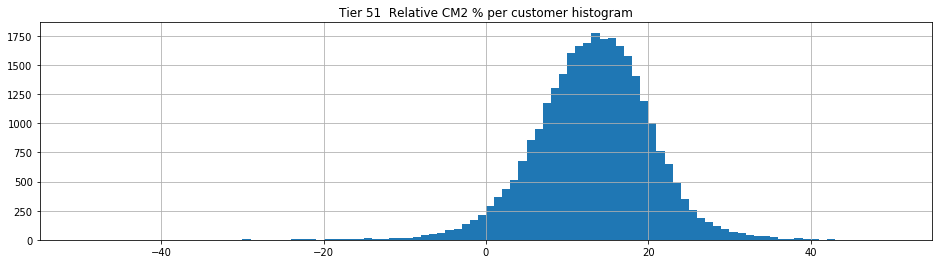

,CM2_REL
count,29434.00
mean,13.03
std,10.92
min,-985.86
25%,8.81
50%,13.41
75%,17.75
max,66.92


CM2% threshold >= 5  is the percentile 11.26
CM2% threshold >= 7  is the percentile 17.39
CM2% threshold >=  9.86  is the percentile 30 allowing us to stay with the 70% of our sample


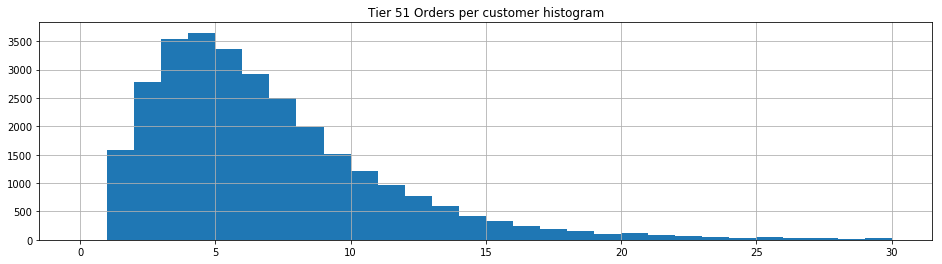

,ORDERS
count,29434.00
mean,6.56
std,5.03
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,105.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  66.18  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  61.71  % from our customers
With CM2% threshold >=  9.86  and Orders >=  4.0  we keep eligible a  52.3  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


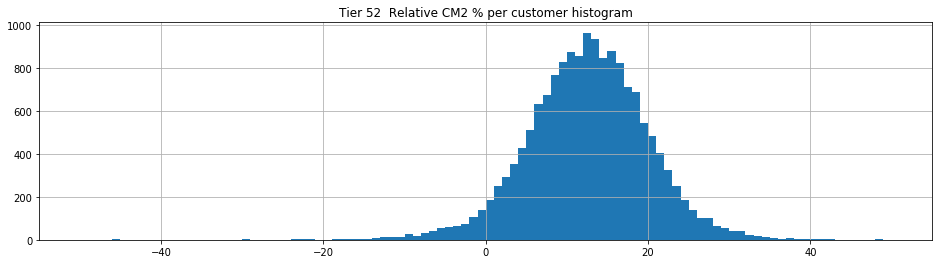

,CM2_REL
count,16088.00
mean,12.16
std,34.09
min,-4153.61
25%,7.94
50%,12.67
75%,17.31
max,64.59


CM2% threshold >= 5  is the percentile 13.87
CM2% threshold >= 7  is the percentile 21.01
CM2% threshold >=  9.0  is the percentile 30 allowing us to stay with the 70% of our sample


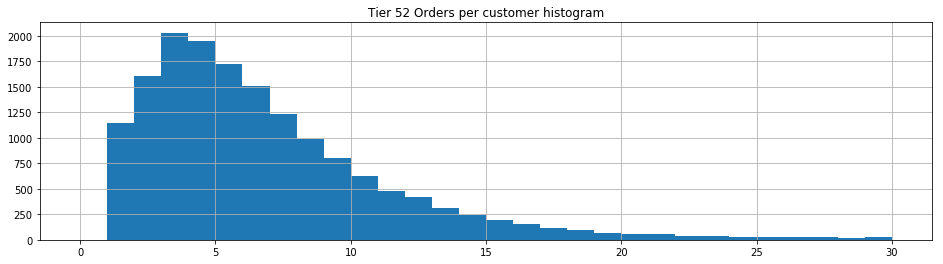

,ORDERS
count,16088.00
mean,6.50
std,5.19
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,110.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  61.59  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  56.42  % from our customers
With CM2% threshold >=  9.0  and Orders >=  4.0  we keep eligible a  49.63  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


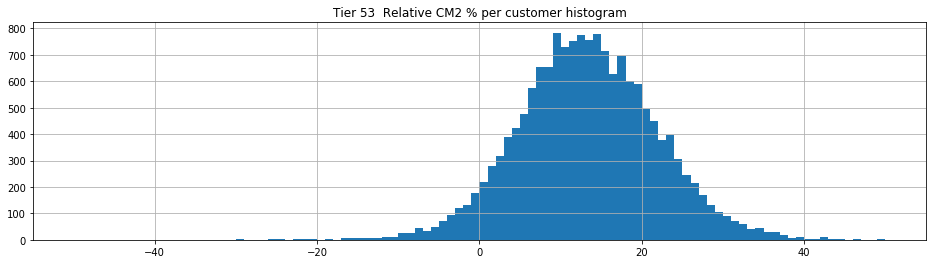

,CM2_REL
count,15992.00
mean,12.65
std,62.93
min,-7822.45
25%,7.66
50%,13.12
75%,18.87
max,74.37


CM2% threshold >= 5  is the percentile 15.61
CM2% threshold >= 7  is the percentile 22.19
CM2% threshold >=  8.9  is the percentile 30 allowing us to stay with the 70% of our sample


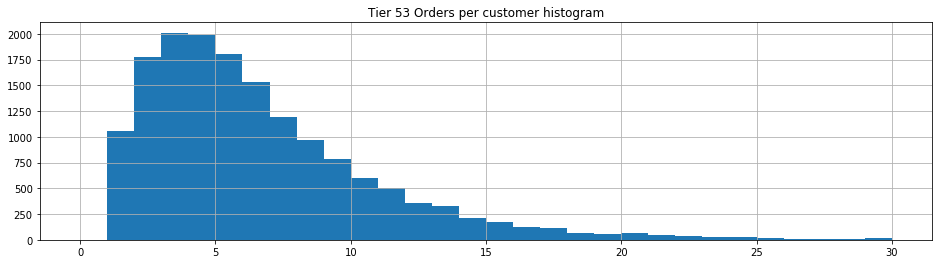

,ORDERS
count,15992.00
mean,6.33
std,7.36
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,717.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  69.88  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  64.25  % from our customers
With CM2% threshold >=  8.9  and Orders >=  3.0  we keep eligible a  57.59  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


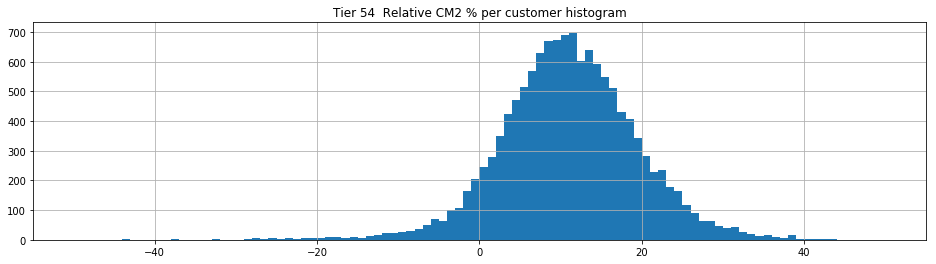

,CM2_REL
count,13023.00
mean,10.38
std,28.42
min,-2457.01
25%,5.79
50%,10.88
75%,16.20
max,64.82


CM2% threshold >= 5  is the percentile 21.68
CM2% threshold >= 7  is the percentile 30.01
CM2% threshold >=  6.99  is the percentile 30 allowing us to stay with the 70% of our sample


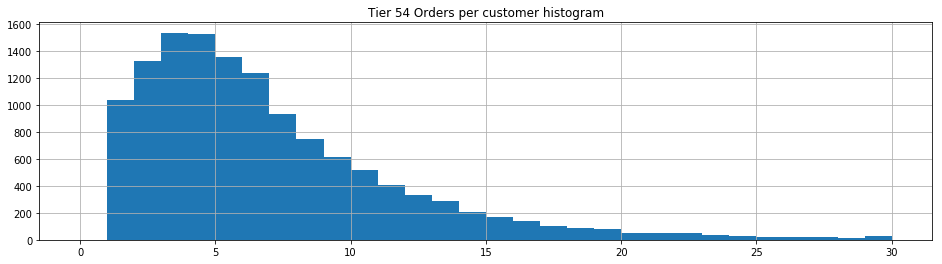

,ORDERS
count,13023.00
mean,6.80
std,8.01
min,1.00
25%,3.00
50%,5.00
75%,9.00
max,466.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  55.86  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  49.52  % from our customers
With CM2% threshold >=  6.99  and Orders >=  4.0  we keep eligible a  49.53  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


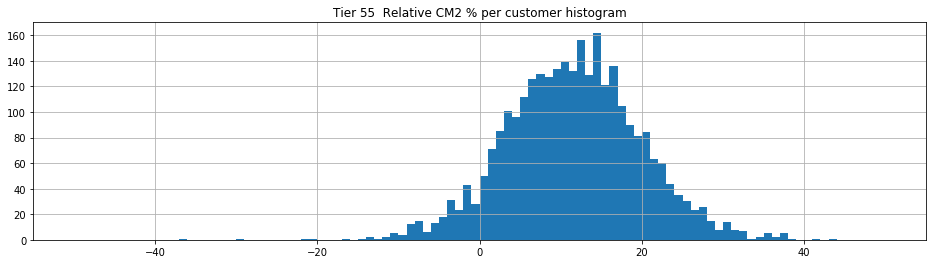

,CM2_REL
count,2934.00
mean,11.30
std,9.83
min,-153.95
25%,6.02
50%,11.54
75%,16.84
max,43.21


CM2% threshold >= 5  is the percentile 21.1
CM2% threshold >= 7  is the percentile 29.21
CM2% threshold >=  7.13  is the percentile 30 allowing us to stay with the 70% of our sample


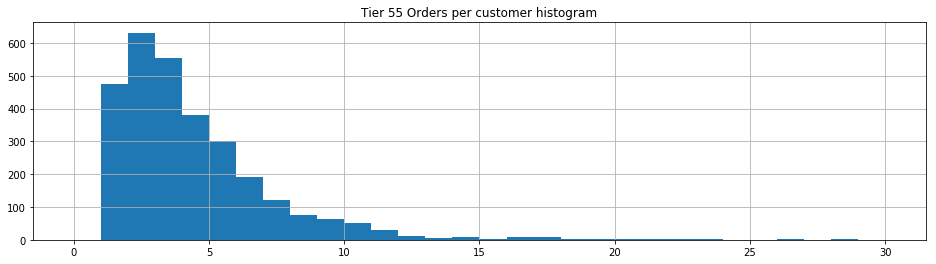

,ORDERS
count,2934.00
mean,3.88
std,2.92
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,32.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  66.05  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  59.1  % from our customers
With CM2% threshold >=  7.13  and Orders >=  2.0  we keep eligible a  58.49  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


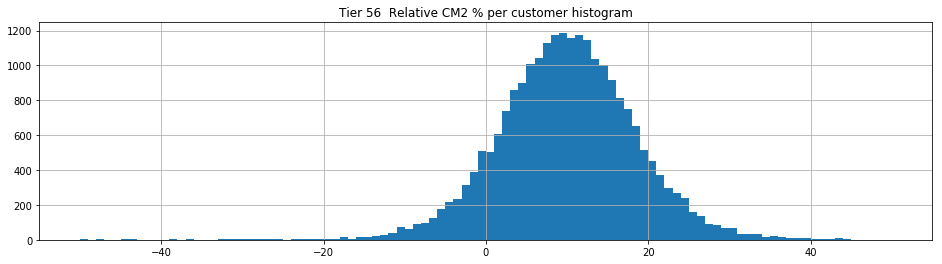

,CM2_REL
count,23279.00
mean,9.72
std,11.67
min,-652.44
25%,4.66
50%,9.97
75%,15.28
max,51.60


CM2% threshold >= 5  is the percentile 26.38
CM2% threshold >= 7  is the percentile 35.17
CM2% threshold >=  5.82  is the percentile 30 allowing us to stay with the 70% of our sample


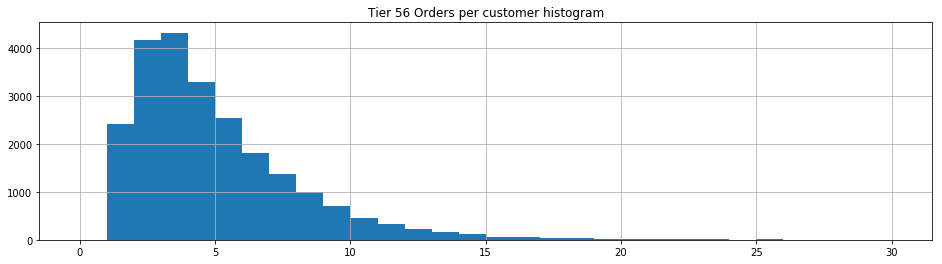

,ORDERS
count,23279.00
mean,4.59
std,5.82
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,687.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  52.26  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  45.55  % from our customers
With CM2% threshold >=  5.82  and Orders >=  3.0  we keep eligible a  49.48  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,17136.0,63.252403,29.989926,3.774587,44.148561,56.341400,73.930771,1059.337900
52,8833.0,72.502470,36.029840,6.797125,48.873033,63.929500,85.885175,495.047962
53,8875.0,66.296258,31.522197,8.782200,45.793595,59.469200,77.504458,442.744160
54,6923.0,78.154744,41.800664,14.387325,51.771330,68.431667,92.661691,735.204850
55,1185.0,54.229848,22.941046,17.983600,38.841500,48.985575,63.312629,282.971300
56,11209.0,61.695859,28.465423,10.603260,42.868825,54.700775,72.334050,377.702586


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,17136.0,13.146545,9.481024,-775.22,9.090,13.49,17.630,45.26
52,8833.0,12.343600,9.286780,-375.31,8.180,12.66,17.100,39.51
53,8875.0,13.062873,10.249004,-419.19,7.735,13.00,18.455,57.03
54,6923.0,10.981856,8.551689,-163.26,6.120,10.90,15.985,41.96
55,1185.0,10.457013,10.690449,-153.95,5.710,11.24,15.720,41.04
56,11209.0,9.198747,9.399022,-267.09,4.500,9.42,14.390,43.86


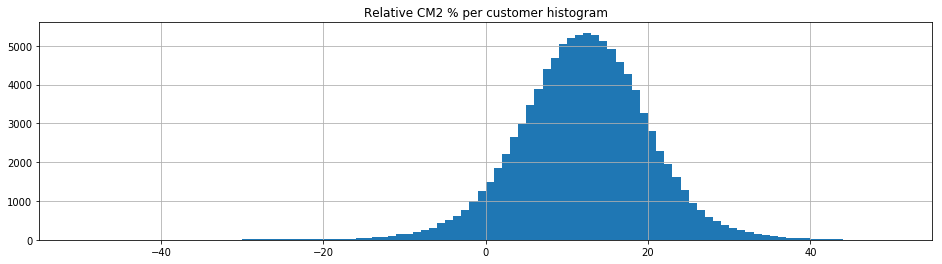

,CM2_REL
count,100750.00
mean,11.67
std,31.46
min,-7822.45
25%,7.04
50%,12.14
75%,17.17
max,74.37


CM2% threshold >= 5  is the percentile 17.49
CM2% threshold >= 6  is the percentile 20.95
CM2% threshold >= 7  is the percentile 24.81
CM2% threshold >= 8  is the percentile 29.17
CM2% threshold >= 9  is the percentile 33.84
CM2% threshold >= 10  is the percentile 38.83
CM2% threshold >=  8.176999999999971  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

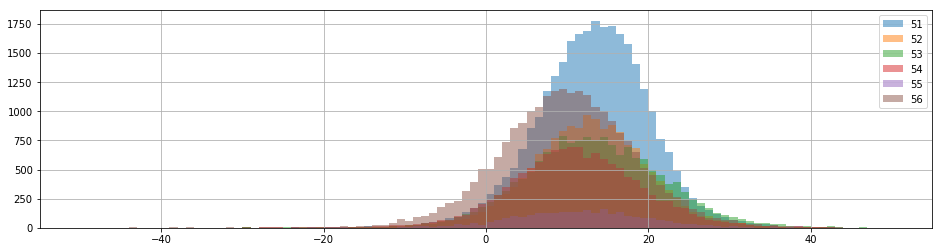

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   